1. Sử dụng dữ liệu bán hàng 'supermarket_sales_vn.csv':
● Vẽ biểu đồ cột, pie về tần số, tuần suất đơn hàng theo
− Địa phương (HN, SG, ĐN)
− Giới tính
● Vẽ biểu đồ histogram về phân bố giá trị đơn hàng, rating
− Phân bố chung
− Theo giới tính, theo địa phương
● Vẽ biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating
● Vẽ biểu đồ tree-map cho các mặt hàng ('Product line')
2. Rút ra nhận xét cho các biểu đồ ở trên
3. Yêu cầu:
● Bố cục trình bày: cần tổ chức các subplots phù hợp cho từng yêu cầu trên

In [864]:
import matplotlib
from matplotlib import pyplot as plt
print(matplotlib.__version__)
import csv
import matplotlib.colors as colors
import squarify

3.4.3


In [312]:
def readFile(fileName):
    city_list = []
    gender_list = []
    total_list = []
    rating_list = []
    product_line_list = []
    date_list = []
    try:
        with open(fileName, 'r', encoding = 'utf8') as f:
            data_reader = csv.DictReader(f)
            for row in data_reader:
                city_list.append(row['City'])
                gender_list.append(row['Gender'])
                total_list.append(float(row['Total']))
                rating_list.append(float(row['Rating']))
                product_line_list.append(row['Product line'])
                date_list.append(row['Date'])
        return city_list, gender_list, total_list, rating_list, product_line_list, date_list
    except:
        print("Cannot open", fileName)
        

● Vẽ biểu đồ cột, pie về tần số, tuần suất đơn hàng theo
− Địa phương (HN, SG, ĐN)
− Giới tính

In [1093]:
def frequencyCity(city_list):
    count_HN = 0
    count_SG = 0
    count_DN = 0
    absFrq_city = []
    relFrq_city = []
    for city in city_list:
        if city == 'Hà Nội': count_HN += 1 
        if city =='TP HCM': count_SG += 1 
        if city == 'Đà Nẵng': count_DN += 1 
    absFrq_city.append(count_SG)
    absFrq_city.append(count_HN)
    absFrq_city.append(count_DN)
    
    pct_HN = 100*absFrq_city[0]/len(city_list)
    relFrq_city.append(pct_HN)
    pct_SG = 100*absFrq_city[1]/len(city_list)
    relFrq_city.append(pct_SG)
    pct_DN = 100*absFrq_city[2]/len(city_list)
    relFrq_city.append(pct_DN)
    
    city_label = ['Hanoi','Saigon','Danang']
    
    fig1 = plt.figure(figsize = (10,4))
    ax1 = fig1.add_subplot(1,2,1)
    ax1.bar(x=range(len(absFrq_city)), height=absFrq_city, width=0.6, color=['lime', 'olive', 'indigo'], alpha = 0.5, align="center")
    ax1.set_xticks([i for i in range(len(absFrq_city))]) 
    ax1.set_xticklabels(city_label)
    ax1.set_title("The Absolute Frequency in Local", size=15)
     
    explode1 = (0.1, 0, 0) 
    colors1 = ['#F0E442', '#009E73', '#D55E00'] 
    ax3 = fig1.add_subplot(1,2,2)
    ax3.pie(absFrq_city, explode=explode1, labels=city_label, autopct='%1.1f%%', colors=colors1,shadow=True, startangle=45)
    ax3.axis('equal')
    ax3.set_title("The Absolute Frequency in Local", size=15)
    plt.legend(city_label, loc=[0.9,0.6])
    
    fig2 = plt.figure(figsize = (10,4))
    ax2 = fig2.add_subplot(1,2,1)
    ax2.bar(x=range(len(relFrq_city)), height=relFrq_city, width=0.6, color=['#E69F00', '#56B4E9', '#F0E442'], alpha = 0.5, align="center")
    ax2.set_xticks([i for i in range(len(relFrq_city))]) 
    ax2.set_xticklabels(city_label)
    ax2.set_title("The Relative Frequency in Local", size=15)
    
    explode2 = (0, 0.1, 0) 
    colors2 = ['yellow', 'green', 'pink'] 
    ax4 = fig2.add_subplot(1,2,2)
    ax4.pie(relFrq_city, explode=explode2, labels=city_label, autopct='%1.1f%%', colors=colors2,shadow=True, startangle=45)
    ax4.axis('equal')
    ax4.set_title("The Relative Frequency in Local", size=15)
    
    plt.legend(city_label, loc=[0.9,0.6])
    plt.tight_layout()    
    plt.show()
        

In [1110]:
def frequencyGender(gender_list):
    count_male = 0
    count_female = 0
    absFrq_gender = []
    relFrq_gender = []
    for gender in gender_list:
        if gender == 'Nam': count_male += 1 
        if gender == 'Nữ': count_female += 1 
    absFrq_gender.append(count_female)
    absFrq_gender.append(count_male)
    
    pct_male = 100*absFrq_gender[0]/len(gender_list)
    relFrq_gender.append(pct_male)
    pct_female = 100*absFrq_gender[1]/len(gender_list)
    relFrq_gender.append(pct_female)
    
    gender_label = ['Male', 'Female']
    
    
    fig1 = plt.figure(figsize = (10,4))
    ax1 = fig1.add_subplot(1,2,1)
    ax1.bar(x=range(len(absFrq_gender)), height=absFrq_gender, width=0.6, color=['crimson', 'royalblue'], alpha = 0.5, align="center")
    ax1.set_xticks([i for i in range(len(absFrq_gender))]) 
    ax1.set_xticklabels(gender_label)
    ax1.set_title("The Absolute Frequency in Gender", size=15)
    
    explode = (0, 0) 
    colors1 = ['#56B4E9', '#F0E442'] 
    ax2 = fig1.add_subplot(1,2,2)
    ax2.pie(absFrq_gender, explode=explode, labels=gender_label, autopct='%1.1f%%', colors=colors1,shadow=True, startangle=90)
    ax2.axis('equal')
    ax2.set_title("The Absolute Frequency in Gender", size=15)
    plt.legend(gender_label, loc=[0.9,0.6])
    
    fig2 = plt.figure(figsize = (10,4))
    ax3 = fig2.add_subplot(1,2,1)
    ax3.bar(x=range(len(relFrq_gender)), height=relFrq_gender, width=0.6, color=["purple","green"], alpha = 0.5, align="center")
    ax3.set_xticks([i for i in range(len(relFrq_gender))]) 
    ax3.set_xticklabels(gender_label)
    ax3.set_title("The Relative Frequency in Gender", size=15)
    
    colors2 = ['blue', 'yellow'] 
    ax4 = fig2.add_subplot(1,2,2)
    ax4.pie(relFrq_gender, explode=explode, labels=gender_label, autopct='%1.1f%%', colors=colors2,shadow=True, startangle=90)
    ax4.axis('equal')
    ax4.set_title("The Relative Frequency in Gender", size=15)
    plt.legend(gender_label, loc=[0.9,0.6])

    plt.tight_layout()    
    plt.show()

● Vẽ biểu đồ histogram về phân bố giá trị đơn hàng, rating
− Phân bố chung
− Theo giới tính, theo địa phương -->

In [1111]:
def distTotal(total_list):
    bins = [i for i in range (10, 1045, 40)]
    fig = plt.figure(figsize = (10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1 = ax1.hist(total_list, bins=bins, rwidth=0.95, facecolor='red', alpha=0.8, edgecolor = 'black')
    plt.title("Histogram of Invoice Values", fontsize=15)
    plt.xticks(bins)
    plt.tight_layout()    
    plt.show()

In [1112]:
def distRating(rating_list):
    fig = plt.figure(figsize = (5,4))
    ax1 = fig.add_subplot(1,1,1)
    ax1 = ax1.hist(rating_list, bins=20, rwidth=0.95, facecolor='blue', alpha=0.75, edgecolor = 'yellow')
    plt.title("Histogram of Rating", size=15)
    plt.xticks([i for i in range (4, 11, 1)])
    plt.tight_layout()    
    plt.show()

In [1113]:
def distLocalTotal(city_list, total_list):
    city_total_list = [item for item in zip(city_list, total_list)]
    hanoi_list = []
    saigon_list = []
    danang_list = []
    for index, row in enumerate(city_total_list):
        if row[0] == 'Hà Nội':
            hanoi_list.append(row[1])
        if row[0] == 'TP HCM':
            saigon_list.append(row[1])
        if row[0] == 'Đà Nẵng':
            danang_list.append(row[1])
            
    colors = ['#F0E442', '#009E73', '#D55E00']
    names = ["Hanoi", "Saigon", "Danang"]
    fig = plt.figure(figsize = (10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1 = ax1.hist([hanoi_list, saigon_list, danang_list], bins=40, rwidth=0.95, color = colors, density= True, alpha=0.75, edgecolor = 'black')
   
    plt.title("Histogram of Cities", size=15)
    plt.xticks([i for i in range (12, 1023, 40)])
    plt.legend(names)
    plt.grid()
    plt.tight_layout()    
    plt.show()

In [1114]:
def distGenderTotal(gender_list, total_list):
    gender_total_list = [item for item in zip(gender_list, total_list)]
    male_list = []
    female_list = []
    for index, row in enumerate(gender_total_list):
        if row[0] == 'Nam':
            male_list.append(row[1])
        if row[0] == 'Nữ':
            female_list.append(row[1])
            
    colors = ['#E69F00', '#56B4E9']
    names = ["Male", "Female"]
    fig = plt.figure(figsize = (10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1 = ax1.hist([male_list, female_list], bins=40, rwidth=0.95, color = colors, density= True, alpha=0.75, 
                   label = names, edgecolor = 'black')
       
    plt.title("Histogram of Genders", size=15)
    plt.xticks([i for i in range (10, 1043, 40)])
    plt.legend()
    plt.grid()
    plt.tight_layout()    
    plt.show()

● Vẽ biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating

In [1115]:
def scatterTotalRating(total_list, rating_list):
    fig = plt.figure(figsize=(11,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(total_list, rating_list, c="orange", alpha=0.5, linewidths = 2, marker = "o", edgecolor = "green") 
    
    ax1.set_title("Correlation between Total Values and Rating", size=15)
    ax1.set_xlabel("Total Values", size = 12)
    ax1.set_ylabel("Rating", size = 12)
    
    plt.tight_layout()
    plt.show() 

● Vẽ biểu đồ tree-map cho các mặt hàng ('Product line')

In [1116]:
def treeMapProductLine(product_line_list, total_list):
    # product_line_list = set(product_line_list)        
    product_line_total_list = [item for item in zip(product_line_list, total_list)]
    health_list = []
    electronic_list = []
    home_list = []
    fashion_list = []
    sports_list = []
    food_list = []
    
    for index, row in enumerate(product_line_total_list):
        if row[0] == 'Health and beauty':
            health_list.append(row[1])
        elif row[0] == 'Electronic accessories':
            electronic_list.append(row[1])
        elif row[0] == 'Home and lifestyle':
            home_list.append(row[1])
        elif row[0] == 'Fashion accessories':
             fashion_list.append(row[1])
        elif row[0] == 'Sports and travel':
            sports_list.append(row[1])
        else:
            food_list.append(row[1])
                
    volume = [round(sum(health_list),2), round(sum(electronic_list),2),round(sum(home_list),2), 
              round(sum(fashion_list),2),round(sum(sports_list),2),round(sum(food_list),2)]
    labels = ['Health and beauty\n volume: {}k'.format(volume[0]), 
              'Electronic accessories\n volume: {}k'.format(volume[1]), 
              'Home and lifestyle\n volume: {}k'.format(volume[2]),
              'Fashion accessories\n volume: {}k'.format(volume[3]),
              'Sports and travel\n volume: {}k'.format(volume[4]),
              'Food and beverages\n volume: {}k'.format(volume[5])]
    colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00','#F9D4D4']
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(2,1,1)
    ax1 = squarify.plot(sizes=volume,label=labels, pad=True, color=colors, alpha=.8, edgecolor='white', linewidth=4)
    ax1.set_title("Product Line Total", size=15)
    
    plt.axis("off")
    plt.tight_layout()
    plt.show()

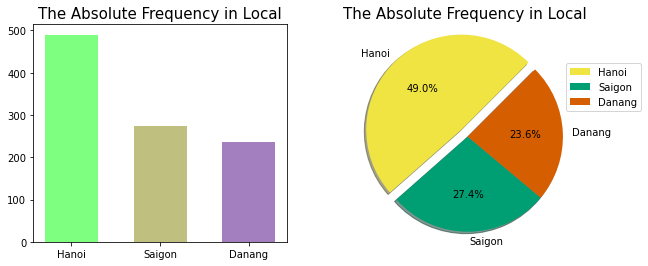

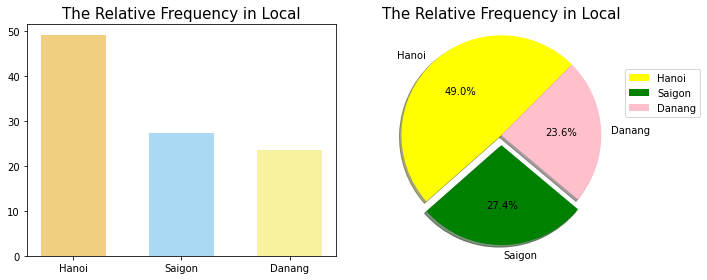

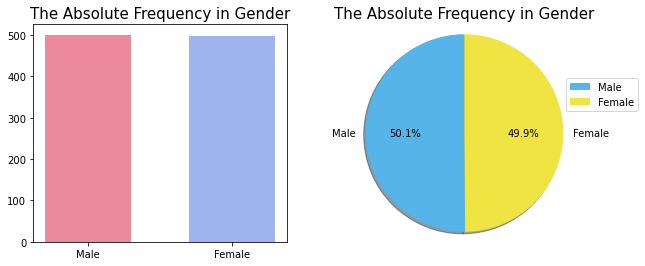

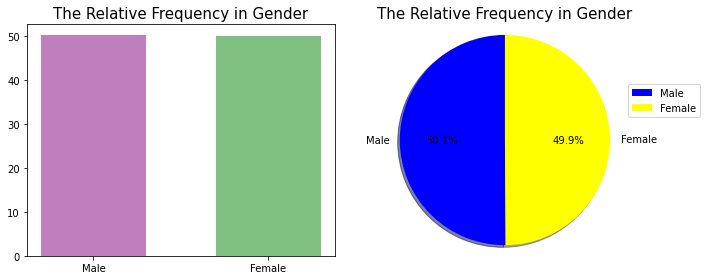

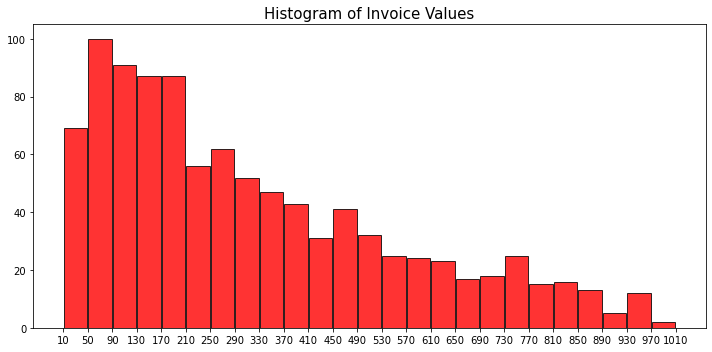

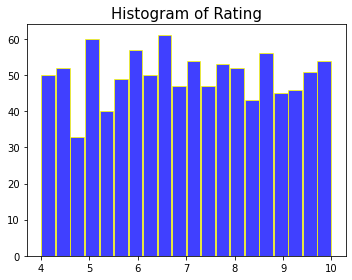

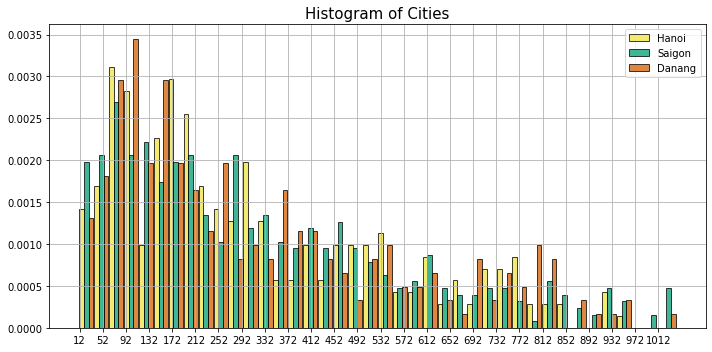

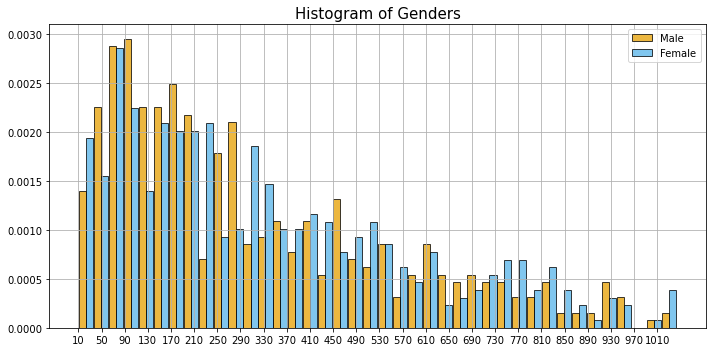

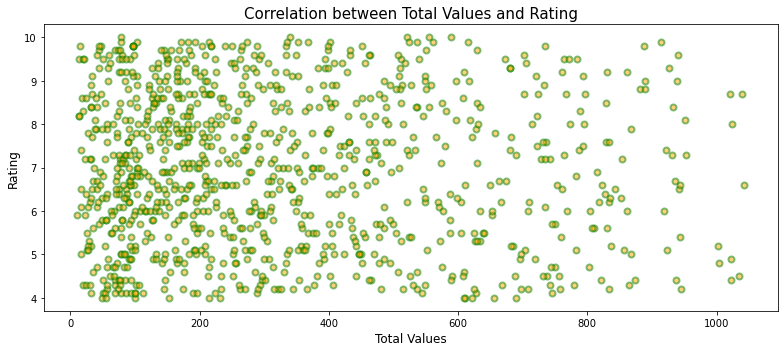

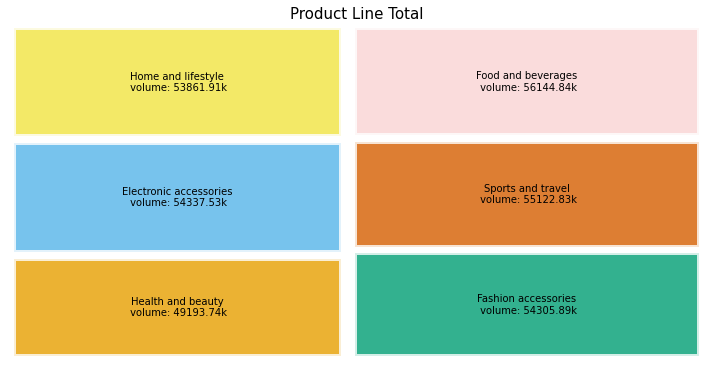

In [1117]:
def main():
    file = "supermarket_sales_vn.csv"
    data_reader = readFile(file)
    data = list(dataReader)
    city_list = data[0]
    gender_list = data[1]
    total_list = data[2]
    rating_list = data[3]
    product_line_list = data[4]
    date_list = data[5]
    frequencyCity(city_list)
    frequencyGender(gender_list)
    distTotal(total_list)
    distRating(rating_list)
    distLocalTotal(city_list, total_list)
    distGenderTotal(gender_list, total_list)
    scatterTotalRating(total_list, rating_list)
    treeMapProductLine(product_line_list, total_list)

if __name__ == '__main__':
    main()


Notes:
- In the graph of the absolute frequency and relative frequency in local, we view that Hanoi is the place that has the most clients among the three cities. 
- From the absolute frequency and relative frequency in genders, men use the products more than women, yet it's not much different.
- From the histogram of invoice values, the range of 50 to 90 has the most data values.
- From the histogram of rating, the middle range of 6 and 7 is the interval with the most rating. 
- From the histogram of Cites, the range between 92 and 132 is the interval that has the most clients, and they are from Danang. 
- From the histogram of genders, men spend the most on the products with the value of 90. 
- The scatter plot between rating and total value shows that the invoice values are less than 200 have the largest clients, including good and low ratings.
- The product line treemap shows the clients spend greatest on the food and beverages and lowest on the health and beauty products.
    